In [23]:
import pandas as pd
import numpy as np

# load subset of sdss data
trimmed = pd.read_pickle('../data/sdss-trimmed.pkl')

%matplotlib inline

# qcut

Building selectors on dataframes with boolean operations is a useful skill, but you might have guessed that selecting data based on quantiles is a common enough procedure that there is something built in to pandas to accomplish this task. If you guessed that, you'd be right. The function is called `qcut` (presumably short for "quantile cut"). Unlike many of the other pandas features we've seen, it isn't a member function of a specific data structure, rather it's a function of the module itself.  Here's how it works.

At minimum, you need to supply the data you're quantizing, and the number of bins to put it in. Here we will quantize the distance, and we'll stick with 100 bins (corresponding to integer percentiles).

In [3]:
pd.qcut(trimmed['DIST_ADOP'], 100)

13         (10.604, 11.233]
21            (5.428, 5.63]
27         (11.233, 11.909]
31           (1.943, 1.991]
33         (10.044, 10.604]
40           (1.759, 1.805]
44           (1.805, 1.852]
83           (7.862, 8.233]
124          (2.284, 2.338]
138          (2.183, 2.233]
180          (2.037, 2.083]
181          (5.062, 5.237]
224          (4.897, 5.062]
228          (2.083, 2.133]
246          (3.027, 3.103]
342          (2.037, 2.083]
346           (4.59, 4.739]
361           (3.44, 3.533]
364          (1.715, 1.759]
395          (2.338, 2.391]
396          (7.511, 7.862]
430           (1.37, 1.413]
465          (1.498, 1.541]
493          (2.446, 2.504]
497        (11.233, 11.909]
512        (11.233, 11.909]
536          (1.715, 1.759]
544          (2.233, 2.284]
575          (2.284, 2.338]
598          (2.883, 2.955]
                 ...       
1843164    (10.044, 10.604]
1843165      (0.915, 0.957]
1843166      (1.244, 1.286]
1843167      (1.081, 1.123]
1843168      (0.433,

You can see that the function returns a Series of dtype category, and includes the list of categories. This is an ordered set of labels (ordered so that sorting can take place). Knowing the percentile boundaries is sometimes what we want, but at other times, we really want some other kind of label. We can specify a list of labels to use. If you're building the list by hand, you'll probably want to use a smallish number of categories:

In [4]:
pd.qcut(trimmed['DIST_ADOP'], 3, labels=["near", "medium", "far"])

13            far
21            far
27            far
31         medium
33            far
40           near
44           near
83            far
124        medium
138        medium
180        medium
181           far
224           far
228        medium
246        medium
342        medium
346           far
361        medium
364          near
395        medium
396           far
430          near
465          near
493        medium
497           far
512           far
536          near
544        medium
575        medium
598        medium
            ...  
1843164       far
1843165      near
1843166      near
1843167      near
1843168      near
1843169      near
1843170    medium
1843171    medium
1843172      near
1843173    medium
1843174    medium
1843175    medium
1843176       far
1843179       far
1843180       far
1843181       far
1843184       far
1843185       far
1843186       far
1843187      near
1843188    medium
1843189      near
1843190    medium
1843191      near
1843192   

On the other hand, you can algorithmically generate labels to make use of a larger set of categores. Back to the integer percentiles:

In [5]:
pd.qcut(trimmed['DIST_ADOP'], 100, labels=list(range(100)))

13         89
21         74
27         90
31         35
33         88
40         31
44         32
83         83
124        42
138        40
180        37
181        72
224        71
228        38
246        54
342        37
346        69
361        59
364        30
395        43
396        82
430        22
465        25
493        45
497        90
512        90
536        30
544        41
575        42
598        52
           ..
1843164    88
1843165    11
1843166    19
1843167    15
1843168     2
1843169     5
1843170    52
1843171    51
1843172     6
1843173    60
1843174    35
1843175    65
1843176    84
1843179    72
1843180    71
1843181    87
1843184    72
1843185    95
1843186    70
1843187    32
1843188    58
1843189    20
1843190    40
1843191    21
1843192    93
1843193    51
1843194    27
1843196    64
1843198    92
1843199    84
Name: DIST_ADOP, Length: 435646, dtype: category
Categories (100, int64): [0 < 1 < 2 < 3 ... 96 < 97 < 98 < 99]

On its own, this series isn't super useful, but we can add it to the original data frame as a column, at which point we can use it as a selector.

In [6]:
trimmed['dist pct'] = pd.qcut(trimmed['DIST_ADOP'], 100, labels=list(range(100)))

selector = trimmed['dist pct'] == 4
trimmed[selector]

,TEFF_ADOP,TEFF_ADOP_N,TEFF_ADOP_UNC,LOGG_ADOP,LOGG_ADOP_N,LOGG_ADOP_UNC,FEH_ADOP,FEH_ADOP_N,FEH_ADOP_UNC,RV_ADOP,RV_ADOP_UNC,DIST_ADOP,L,B,TEFF_UNC_REL,dist pct
12862,4058.451904,1,32.128567,4.225441,1,0.105319,-1.557165,1,0.065484,22.807182,3.288853,0.627751,267.988262,57.068694,0.007916,4
13056,4014.100098,1,22.269833,4.161529,1,0.071218,-1.568845,1,0.058351,66.682373,3.648920,0.638949,265.479671,55.803419,0.005548,4
14431,4581.783691,3,95.160530,4.528010,3,0.127618,-0.461782,1,0.070600,38.229874,2.741058,0.616962,267.843575,58.183265,0.020769,4
16883,4523.162598,3,12.997714,4.398985,4,0.104363,-0.447047,3,0.082922,64.430168,1.400937,0.625868,275.745804,58.863535,0.002874,4
17526,4517.212402,3,12.806907,4.342467,4,0.136568,-0.417284,3,0.067241,62.163269,0.837151,0.635792,275.745804,58.863535,0.002835,4
36112,4334.391602,3,63.066872,4.067270,3,0.150127,-0.461168,1,0.038500,-29.805321,2.500402,0.604349,342.678223,54.886841,0.014550,4
41150,5666.124023,7,40.748249,4.151165,6,0.094597,-0.867248,7,0.027775,-34.324165,2.505984,0.599489,355.563621,49.849228,0.007192,4
46101,4126.911621,2,6.097168,4.105289,2,0.313435,-0.549701,1,0.069197,54.402962,1.627835,0.632631,285.154842,61.371173,0.001477,4
46306,4481.349121,3,15.167405,4.324596,4,0.089860,-0.871512,2,0.121449,62.793442,1.412261,0.650321,281.422611,60.663163,0.003385,4
46395,4391.110352,3,39.338833,4.423725,4,0.033512,-1.177721,1,0.083392,60.865208,1.947099,0.634196,280.120769,60.922738,0.008959,4


# groupby

While we can build selectors for individual groupings, it is often the case that we want to do something similar to each group. For example, we may want to group these stars by distance percentile, and then plot a histogram of some quantity for each percentile grouping. Again, this is a common enough activity that pandas has some built-in functionality to take care of it. It's called `groupby`. Simply pass in the name of the column you wish to group on:

In [14]:
trimmed.groupby('dist pct')

Unfortunately, the thing that gets returned (the DataFrameGroupBy object) doesn't have a very friendly string representation. We can, however, store it in a variable, and then use some of its features.

In [15]:
grouped = trimmed.groupby('dist pct')
grouped.ngroups

100

In [32]:
grouped.get_group(3)

,TEFF_ADOP,TEFF_ADOP_N,TEFF_ADOP_UNC,LOGG_ADOP,LOGG_ADOP_N,LOGG_ADOP_UNC,FEH_ADOP,FEH_ADOP_N,FEH_ADOP_UNC,RV_ADOP,RV_ADOP_UNC,DIST_ADOP,L,B,TEFF_UNC_REL,dist pct
2606,4070.950195,2,1.375366,4.523466,1,0.051781,-1.206802,1,0.068428,-7.568965,2.639140,0.542439,241.458410,40.984233,0.000338,3
3245,4066.422363,1,16.719521,4.611303,1,0.053343,-1.263527,1,0.074099,-12.337712,2.503155,0.535253,241.458410,40.984233,0.004112,3
3633,4078.529053,2,19.340088,4.302081,2,0.029168,-1.335778,1,0.092868,30.664669,2.137238,0.564564,239.624860,41.633559,0.004742,3
5631,4819.092773,3,297.860870,4.466792,4,0.104186,-0.182855,3,0.058542,53.238129,1.286323,0.578377,244.362128,45.848979,0.061808,3
5899,4508.715820,3,13.919330,4.271870,4,0.125618,-0.452160,2,0.063309,38.294239,1.610392,0.590527,247.463372,46.150075,0.003087,3
12447,4974.941406,3,54.127655,4.486216,4,0.046447,-0.065185,2,0.051029,16.449684,1.316156,0.532359,265.005118,55.735853,0.010880,3
13081,4959.233398,3,66.353897,4.424637,4,0.098963,-0.071474,2,0.077935,9.380190,0.886797,0.530113,265.005118,55.735853,0.013380,3
25111,4519.994141,3,43.202641,4.430292,4,0.077794,-1.208416,2,0.071496,-8.937873,1.251686,0.575125,315.407979,61.891619,0.009558,3
25750,4517.801758,3,37.777534,4.533199,4,0.033084,-1.120960,3,0.050792,-11.241727,1.176592,0.588425,315.407979,61.891619,0.008362,3
31117,5127.927734,6,42.035801,4.199733,6,0.120285,-0.672443,5,0.050826,-0.007597,1.713794,0.576327,327.795787,60.560191,0.008197,3


Text(0.5,0,'Binned distance from earth (percentile)')

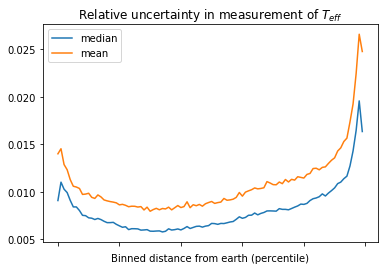

In [29]:
grouped.TEFF_UNC_REL.median().plot(label="median")
ax = grouped.TEFF_UNC_REL.mean().plot(label="mean")
ax.legend()
ax.set_title("Relative uncertainty in measurement of $T_{eff}$")
ax.set_xlabel("Binned distance from earth (percentile)")